In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

In [5]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [6]:
pd.set_option("display.max_columns",32)

## 삼성 라이온즈는 FA에서 어떤 포지션의 선수를 영입해야 할까?

- 리그 상위권 팀과의 비교했을 때 삼성의 부족한 포지션은 1B와 RF, SS
- OPS ( 출루 + 장타 )는 NC, 두산, 삼성 중 가장 낮은 수치를 보이며, 해당 포지션에 상대방에 부담을 주는 타자가 없다는 것을 알 수 있음
- SS는 공격보단 수비력이 우선시 되는 포지션, 하지만 1B, RF에는 장타를 잘치며, 상대방 투수에게 장타에 대한 부담감으로 출루율 또한 높은 중장거리 혹은 장타유형의 타자가 필요
- 2020년 타자들의 평균 출루율, 장타율과 차이가 많이나는 삼성의 포지션은 SS <  RF  < 1B 
- SS, RF, 1B 모두 FA 혹은 용병 타자로 전력보강 가능

In [15]:
fa = pd.read_csv("2021FA.csv")

In [16]:
fa = fa[fa["타석"] > 200]
fa

,팀,시즌,이름,포지션,WAR,출장,타석,타수,득점,안타,2루타,3루타,홈런,루타,타점,도루,볼넷,사구,고4,삼진,병살,타율,출루,장타,OPS
0,KIA,20,최형우,DH,5.70,140,600,522,93,185,37,1,28,308,115,0,70,5,5,101,9,0.354,0.433,0.590,1.023
1,두산,20,최주환,2B,4.02,140,573,508,63,155,29,4,16,240,86,2,48,6,5,66,7,0.305,0.365,0.472,0.838
2,두산,20,오재일,1B,3.59,127,534,471,62,147,32,0,16,227,89,2,61,0,1,92,12,0.312,0.390,0.482,0.872
3,두산,20,허경민,3B,3.56,117,487,437,70,145,25,1,7,193,58,14,35,5,2,28,10,0.332,0.382,0.442,0.824
4,두산,20,정수빈,CF,2.98,141,559,490,84,146,17,8,5,194,59,15,55,2,3,56,10,0.298,0.368,0.396,0.764
5,두산,20,김재호,SS,1.99,120,457,401,48,116,15,1,2,139,39,6,45,4,1,45,17,0.289,0.363,0.347,0.709
6,삼성,20,이원석,3B,1.27,121,467,403,46,108,17,0,13,164,74,0,49,2,1,82,7,0.268,0.341,0.407,0.748
7,롯데,20,이대호,DH,1.01,144,611,542,67,158,27,0,20,245,110,1,53,5,9,68,21,0.292,0.354,0.452,0.806
8,SK,20,김성현,SS,0.49,133,392,343,34,93,9,1,2,110,25,1,30,5,0,27,10,0.271,0.336,0.321,0.657


In [17]:
x = fa["출루"]
y = fa["장타"]
n = fa["이름"]

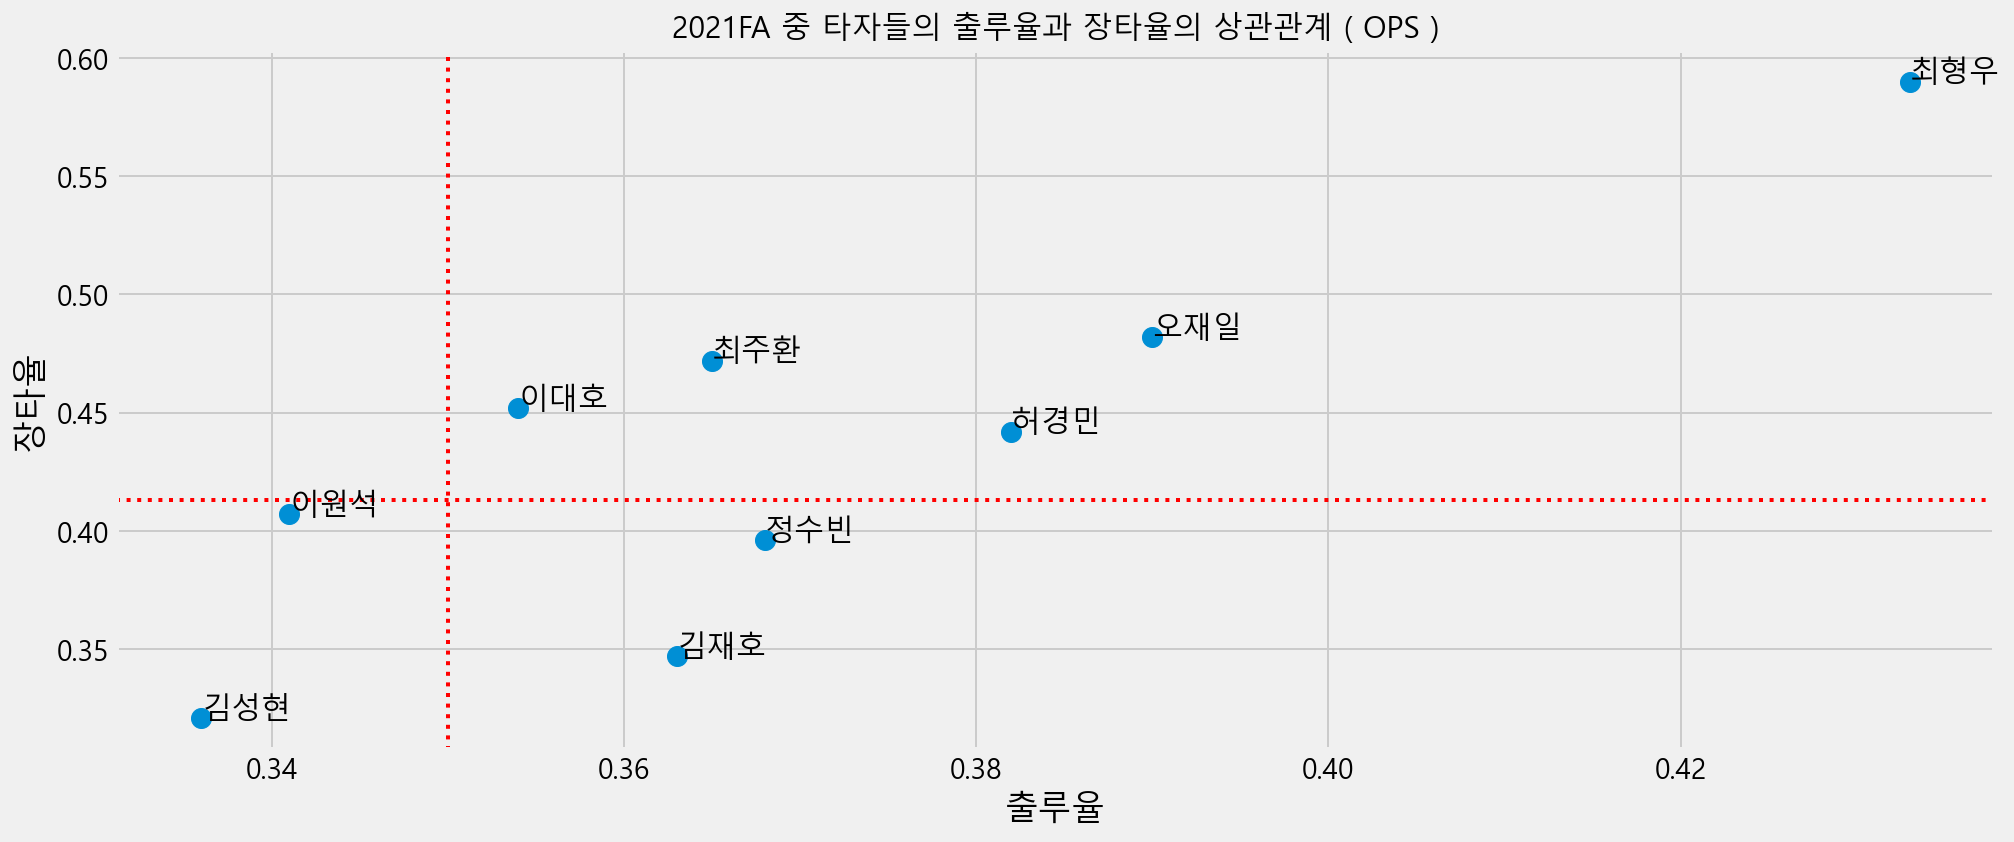

In [14]:
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(x,y,s=100)

plt.xlabel("출루율")
plt.ylabel("장타율")
plt.title("2021FA 중 타자들의 출루율과 장타율의 상관관계 ( OPS )",fontsize=15)

plt.axvline(x=0.35, color='r',linestyle=':', linewidth=2)
plt.axhline(y=0.413, color='r',linestyle=':', linewidth=2)
for i, txt in enumerate(n):
    ax.annotate(txt,(x[i],y[i]),fontsize=15)

- 출루율과 장타율의 평균을 넘는 선수들 중 삼성에 필요한 유형의 선수는 최형우, 오재일, 최주환, 허경민, 이대호
- 최형우와 이대호의 포지션은 DH, 최주환은 2B, 허경민은 3B, 오재일은 1B
- 출루율과 장타율, 포지션을 고려해보았을때 가장 높은 우선순위는 오재일(1B), 차순위는 허경민(3B)
- 허경민을 영입하지 못할 경우 동포지션의 이원석(3B)는 출루율은 아쉽지만 장타율은 여전히 리그 평균을 유지 -> 재계약 긍정적
- 부족한 RF의 경우 17~19시즌 RF 경험이 많은 구자욱의 포지션 변경 혹은 용병타자 영입으로 공격력을 높일 수 있음